# Signal Processing in Practice Laboratory

**Assignment 2: Graph Machine Learning**




**Submission instructions:**


*   **Make a copy of the Colab .ipynb file** and **share the link in Teams** as instructed.
* Use text cells to answer. Type equations in Latex in a text cell.
* For the programming part the homework, use code cell and text cell. The submitted codes should compile without any errors and do not erase the outputs.

In [ ]:
# Name: Bhaskar Karol
# SR number: 24076

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans, SpectralClustering
import sklearn.datasets

***Spectral clustering*** is a popular unsupervised machine learning algorithm that often outperforms other approaches. In addition, spectral clustering is very simple to implement and can be solved efficiently by standard linear algebra methods. In spectral clustering, the affinity, and not the absolute location (i.e. k-means), determines what points fall under which cluster. The latter is particularly useful in tackling problems where the data forms complicated shapes.

**Algorithm**

The algorithm can be broken down into 4 basic steps.
1. Construct a similarity graph
2. Determine the Adjacency matrix W, Degree matrix D and the Laplacian matrix L
3. Compute the eigenvectors of the matrix L
4. Using the second smallest eigenvector as input, train a k-means model and use it to classify the data

In [ ]:
!pip install scprep tasklogger

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 26.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 2.0.3 which is incompatible.


In [ ]:
import scprep
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel

#### Preparing the data

Here, we are going to implement the SpectralClustering algorithm as well as the KMeans algorithm on the two moons - two interleaving half circles dataset

Because we're generating these from scratch, we get to change some parameters of their distributions. Generally, we can change:

1. noise - the amount of Gaussian noise added to each point
2. n_samples - the number of points generated

In [ ]:
np.random.seed(0)

''' Generate datasets. We choose the size big enough to see the scalability
    of the algorithms, but not too big to avoid too long running times '''

n_samples = 1500

# Moons dataset
noisy_moons = sklearn.datasets.make_moons(n_samples=n_samples,
                                          noise=.05)

X, y = noisy_moons

<Axes: xlabel='x0', ylabel='x1'>

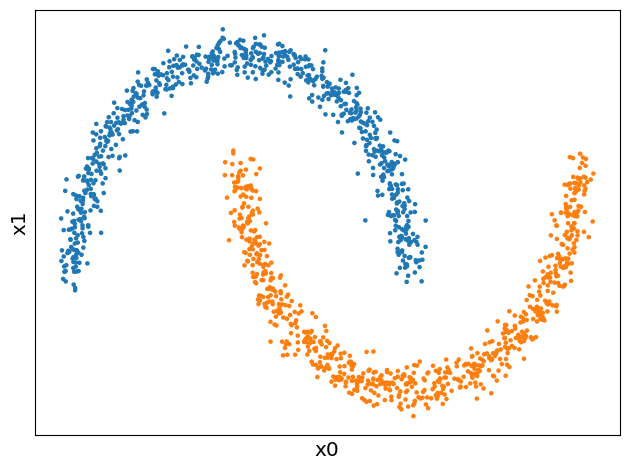

In [ ]:
# Normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)
scprep.plot.scatter2d(X, c=y,
                          ticks=None,
                          xlabel='x0', ylabel='x1',
                         legend=False)

Write the code for spectral clustering algorithm

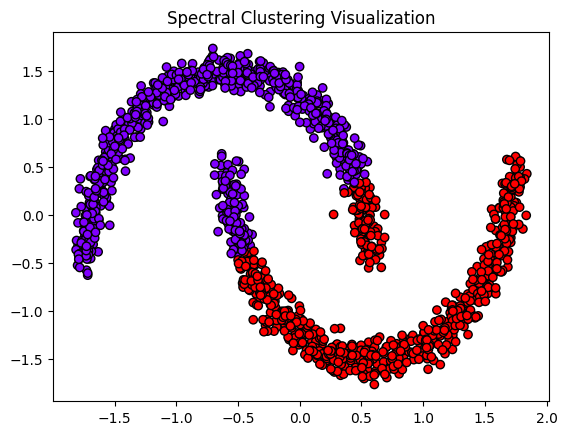

Cluster assignments: [0 1 1 ... 1 0 0]


In [ ]:
#Write your code here
gamma_value = 0.5
affinity_matrix = rbf_kernel(X, gamma=gamma_value)
degree_matrix = np.diag(affinity_matrix.sum(axis=1))
laplacian_matrix = degree_matrix - affinity_matrix
eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)

num_clusters = 2
cluster_features = eigenvectors[:, 1:num_clusters+1]
kmeans_cluster = KMeans(n_clusters=num_clusters, random_state=0).fit(cluster_features)

plt.scatter(X[:, 0], X[:, 1], c=kmeans_cluster.labels_, cmap='rainbow', edgecolors='k')
plt.title("Spectral Clustering Visualization")
plt.show()

print("Cluster assignments:", kmeans_cluster.labels_)
